In [174]:
import numpy as np 
import pandas as pd
import datetime # para convertir a dia de la semana
import calendar # idem

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# https://github.com/idontdomath/datos-exploratory-data-analysis/blob/master/class01/03-intro-pandas-flight-delays.ipynb

In [ ]:
# estatus = pd.read_csv('status.csv', sep='\t', iterator=True, chunksize=1000)
#cada vez que se corre son los proximos 500
# estatus.get_chunk(500)

In [320]:
trips = pd.read_csv('trip.csv', low_memory=False)
weather = pd.read_csv('weather.csv', low_memory=False)
#Se convierte los dates a datetime64[ns].
trips['start_date'] = pd.to_datetime(trips['start_date'])
trips['end_date'] = pd.to_datetime(trips['end_date'])
weather['date'] = pd.to_datetime(weather['date'])

In [321]:
#Se agrega una nueva columna date que coincide con weather.
trips['date'] = trips['start_date'].apply(lambda x: x.date())
#Se convierte date a datetime64[ns].
trips['date'] = pd.to_datetime(trips['date'])

In [323]:
#Se convierte zip_code a string en weather para coincidir con trips.
#NOTA: No se convierte zip_code de trips a int64 por un extraño error en to_numeric.
weather['zip_code'] = weather['zip_code'].astype(str)

In [324]:
#Formula para convertir F a C.
def f_to_c(f_temp):
    return round((f_temp - 32) / 1.8, 2)

In [325]:
#Se crean columnas con las temperaturas en C.
weather['max_temperature_c'] = weather['max_temperature_f'].map(f_to_c)
weather['mean_temperature_c'] = weather['mean_temperature_f'].map(f_to_c)
weather['min_temperature_c'] = weather['min_temperature_f'].map(f_to_c)

In [326]:
#Se crean columnas con visibilidad en Km.
weather['max_visibility_km'] = weather['max_visibility_miles'].map(lambda x: x * 1.6)
weather['mean_visibility_km'] = weather['mean_visibility_miles'].map(lambda x: x * 1.6)
weather['min_visibility_km'] = weather['min_visibility_miles'].map(lambda x: x * 1.6)

In [327]:
#Se combinan los Dataframes.
joined = trips.merge(weather, left_on=['date', 'zip_code'], right_on=['date', 'zip_code'])

In [328]:
trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
date                  datetime64[ns]
dtype: object

In [ ]:
# ejemplo del uso de datetime con día actual
dia_actual = datetime.datetime.today()
dia_actual

In [ ]:
# lo paso a dia de la semana
dia_actual.weekday()

In [ ]:
# mejor en palabras que en números
calendar.day_name[my_date.weekday()]

In [329]:
# función para convertir fecha a día de la semana.
def fecha_a_dia(fecha):
    return calendar.day_name[fecha.weekday()]

In [330]:
#Se crean columnas con los dias de la semana.
weather['day_of_week'] = weather['date'].map(fecha_a_dia)
trips['start_day_of_week'] = trips['start_date'].map(fecha_a_dia)
trips['end_day_of_week'] = trips['end_date'].map(fecha_a_dia)

In [331]:
trips['horario_inicial'] = trips['start_date'].dt.time
trips['horario_inicial_float'] = trips['start_date'].dt.hour + trips['start_date'].dt.minute / 100
#por el momento dejo ambos por si se necesitan

In [332]:
trips['horario_final'] = trips['end_date'].dt.time
trips['horario_final_float'] = trips['end_date'].dt.hour + trips['end_date'].dt.minute / 100
#idem

In [333]:
trips['duracion_viaje'] = trips['end_date'] - trips['start_date']
# trips['duracion_viaje'] = pd.to_datetime(trips['duracion_viaje'])
# no es necesario pero lo dejo por las dudas, puede servir

In [334]:
# vista final de cómo quedó el dataframe
trips

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,start_day_of_week,end_day_of_week,horario_inicial,horario_inicial_float,horario_final,horario_final_float,duracion_viaje
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,94127,2013-08-29,Thursday,Thursday,14:13:00,14.13,14:14:00,14.14,00:01:00
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,95138,2013-08-29,Thursday,Thursday,14:42:00,14.42,14:43:00,14.43,00:01:00
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,97214,2013-08-29,Thursday,Thursday,10:16:00,10.16,10:17:00,10.17,00:01:00
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,95060,2013-08-29,Thursday,Thursday,11:29:00,11.29,11:30:00,11.30,00:01:00
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013-08-29,Thursday,Thursday,12:02:00,12.02,12:04:00,12.04,00:02:00
5,4927,103,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,94109,2013-08-29,Thursday,Thursday,18:54:00,18.54,18:56:00,18.56,00:02:00
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,2013-08-29,Thursday,Thursday,13:25:00,13.25,13:27:00,13.27,00:02:00
7,4563,111,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,95112,2013-08-29,Thursday,Thursday,14:02:00,14.02,14:04:00,14.04,00:02:00
8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,94103,2013-08-29,Thursday,Thursday,17:01:00,17.01,17:03:00,17.03,00:02:00
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,2013-08-29,Thursday,Thursday,11:33:00,11.33,11:35:00,11.35,00:02:00


In [335]:
trips.id.count()

669959

In [336]:
# una primera impresión es que hay viajes "basura" que duran menos de 3 minutos y que las estaciones de inicio y fin
# son las mismas, esto dice que el usuario no tomó el viaje por algún motivo
# se van a filtrar esos viajes
trips = trips[-((trips['duracion_viaje'] <= '00:03:00') & (trips['start_station_id'] == trips['end_station_id']))]

In [278]:
# no es necesario pero lo dejo por las dudas, puede servir
# trips[-((trips['duracion_viaje'] < '1970-01-01 00:10:00') & (trips['start_station_id'] == trips['end_station_id']))]

In [337]:
# ahora los datos quedan más limpios
trips

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,start_day_of_week,end_day_of_week,horario_inicial,horario_inicial_float,horario_final,horario_final_float,duracion_viaje
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013-08-29,Thursday,Thursday,12:02:00,12.02,12:04:00,12.04,00:02:00
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,2013-08-29,Thursday,Thursday,13:25:00,13.25,13:27:00,13.27,00:02:00
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,2013-08-29,Thursday,Thursday,11:33:00,11.33,11:35:00,11.35,00:02:00
10,4549,125,2013-08-29 13:52:00,Spear at Folsom,49,2013-08-29 13:55:00,Embarcadero at Bryant,54,368,Subscriber,94109,2013-08-29,Thursday,Thursday,13:52:00,13.52,13:55:00,13.55,00:03:00
11,4498,126,2013-08-29 13:23:00,San Pedro Square,6,2013-08-29 13:25:00,Santa Clara at Almaden,4,26,Subscriber,95112,2013-08-29,Thursday,Thursday,13:23:00,13.23,13:25:00,13.25,00:02:00
14,4386,134,2013-08-29 12:31:00,Clay at Battery,41,2013-08-29 12:33:00,Beale at Market,56,503,Subscriber,94109,2013-08-29,Thursday,Thursday,12:31:00,12.31,12:33:00,12.33,00:02:00
18,5097,142,2013-08-29 22:21:00,Steuart at Market,74,2013-08-29 22:24:00,Harry Bridges Plaza (Ferry Building),50,564,Subscriber,94115,2013-08-29,Thursday,Thursday,22:21:00,22.21,22:24:00,22.24,00:03:00
19,5084,144,2013-08-29 22:06:00,Powell Street BART,39,2013-08-29 22:08:00,Market at 4th,76,574,Subscriber,94115,2013-08-29,Thursday,Thursday,22:06:00,22.06,22:08:00,22.08,00:02:00
20,4982,146,2013-08-29 19:42:00,Spear at Folsom,49,2013-08-29 19:44:00,Embarcadero at Bryant,54,542,Subscriber,94105,2013-08-29,Thursday,Thursday,19:42:00,19.42,19:44:00,19.44,00:02:00
23,5093,160,2013-08-29 22:12:00,Post at Kearney,47,2013-08-29 22:14:00,Market at Sansome,77,442,Subscriber,94115,2013-08-29,Thursday,Thursday,22:12:00,22.12,22:14:00,22.14,00:02:00


In [338]:
trips.id.count()
# se filtraron unos 3000 viajes aprox (podria servir para una conclusion de cuantas bicicletas en promedio
# estan descompuestas probablemente??)

667358

## 1) Análisis de viajes según día y horario

En esta serie de plots se analizará la relación entre los viajes en bicicleta y el día/horario de la semana.

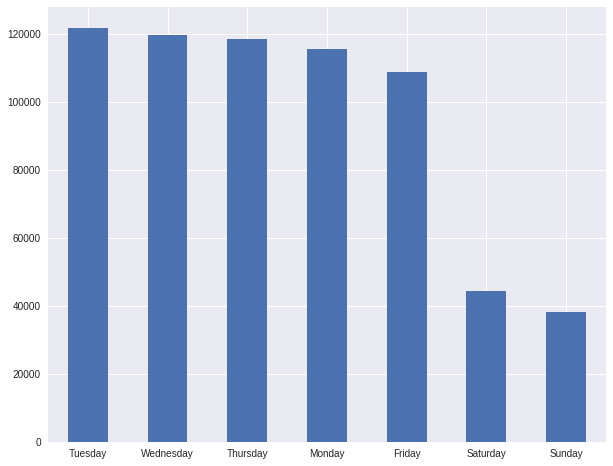

In [394]:
trips['start_day_of_week'].value_counts().plot(kind='bar', rot=0, figsize=(10,8));

Se ve que hay una diferencia drástica entre la semana y el fin de semana.

Picos de horarios de uso.

In [377]:
picos = trips[['start_day_of_week','horario_inicial_float']].round()
picos

,start_day_of_week,horario_inicial_float
4,Thursday,12.0
6,Thursday,13.0
9,Thursday,11.0
10,Thursday,14.0
11,Thursday,13.0
14,Thursday,12.0
18,Thursday,22.0
19,Thursday,22.0
20,Thursday,19.0
23,Thursday,22.0


In [409]:
picos_semana = picos[-(picos['start_day_of_week'] == "Saturday")]
picos_semana = picos[-(picos['start_day_of_week'] == "Sunday")]

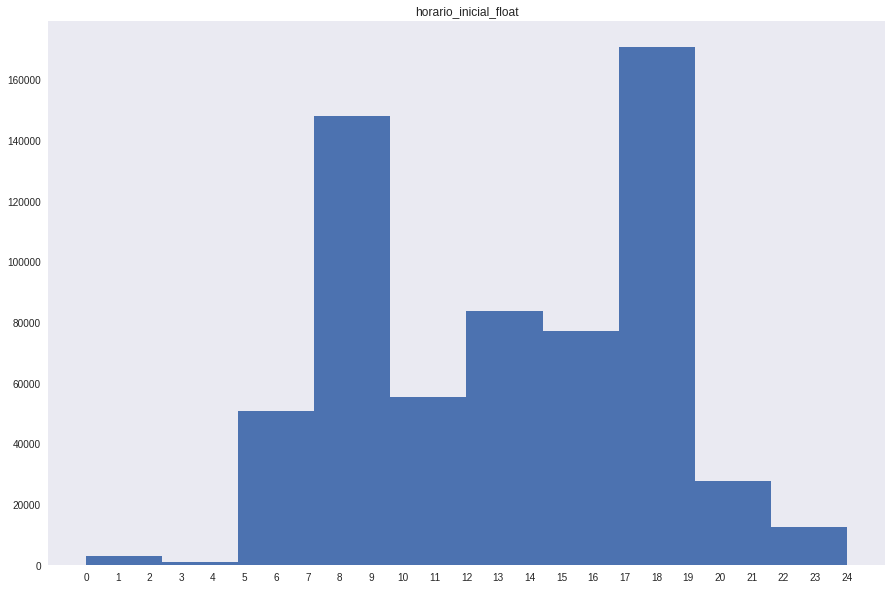

In [397]:
picos_semana.hist(column='horario_inicial_float', grid=False, figsize=(15,10), xrot=0);
plt.xticks(range(0,25,1));

Se aprecia que los horarios pico son de 7 a 9 y de 17 a 19, particularmente cuando la gente va y cuando regresa
al trabajo, escuela, etc.

In [410]:
picos_finde = picos[(picos['start_day_of_week'] == "Saturday") | (picos['start_day_of_week'] == "Sunday")]

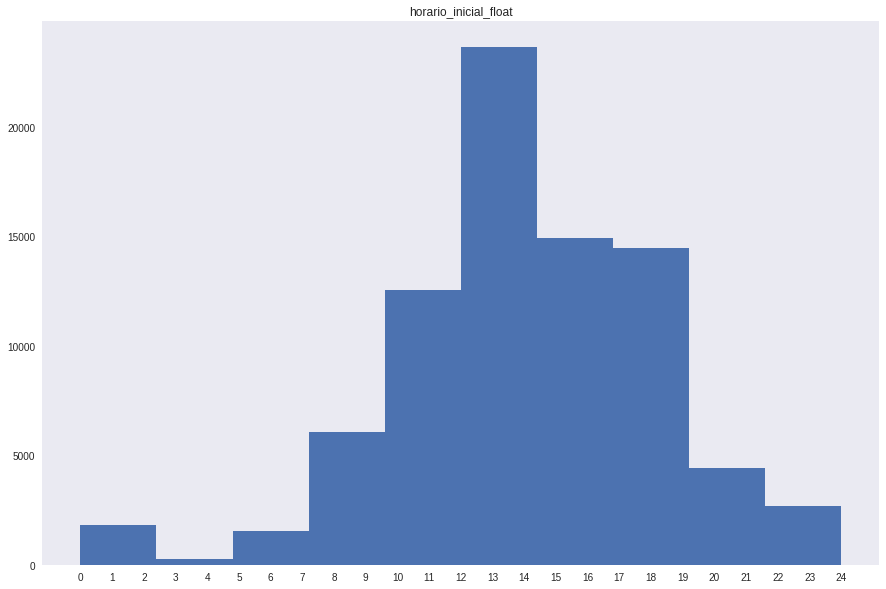

In [408]:
picos_finde.hist(column='horario_inicial_float', grid=False, figsize=(15,10), xrot=0);
plt.xticks(range(0,25,1));

Los horarios pico son de 12 a 14. También lo que se observa es el poco uso del servicio durante la noche (de 22 a 24). Esto refleja que la bicicleta no está entre los transportes más usados para moverse cuando la gente desea salir por la noche.

In [ ]:
# como afecta que sea feriado en comparacion a un no feriado